In [1]:
import os
import sys

# Data science packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit Learn utility classes & functions
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Scikit Learn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor,
                              RandomForestRegressor)
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor

PROJECT_PATH = os.path.abspath(os.path.join(os.getcwd(), '../'))

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)
    
from src.data.player_data import player_data
from src.model.metrics import measure_estimators, regression_accuracy

np.random.seed(42)

In [2]:
match_df = player_data()
match_df

/usr/local/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)




|==                                                    |  4% ~6 s remaining

 

 

 

 

 


|===                                                   |  7% ~6 s remaining

 

 

 

 

 


/usr/local/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Returning data from 1965-01-01 to 2018-10-15

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Downloading data


  warnings.warn(x, RRuntimeWarning)




|====                                                  |  9% ~6 s remaining

 

 

 

 

 


|======                                                | 11% ~7 s remaining

 

 

 

 

 


|=======                                               | 13% ~8 s remaining

 

 

 

 

 


|========                                              | 16% ~7 s remaining

 

 

 

 

 


|=========                                             | 18% ~7 s remaining

 

 

 

 

 


|==========                                            | 20% ~6 s remaining

 

 

 

 

 


|============                                          | 22% ~7 s remaining

 

 

 

 

 


|=============                                         | 24% ~6 s remaining

 

 

 

 

 


|==============                                        | 27% ~7 s remaining

 

 

 

 

 


|===============                                       | 29% ~6 s remaining

 

 

 

 

 


|================                                      | 31% ~6 s re

/usr/local/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Finished downloading data. Processing XMLs


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning:
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  396 parsing failures.
row # A tibble: 5 x 5 col     row col   expected   actual file                                             expected   <int> <chr> <chr>      <chr>  <chr>                                            actual 1  8713 Round an integer QF     'https://afltables.com/afl/stats/2018_stats.txt' file 2  8714 Round an integer QF     'https://afltables.com/afl/stats/2018_stats.txt' row 3  8715 Round an integer QF     'https://afltables.com/afl/stats/2018_stats.txt' col 4  8716 Round an integer QF     'https://afltables.com/afl/stats/2018_stats.txt' expected 5  8717 Round an integer QF     '

team  year  round_number  \
team             year round_number                                         
Adelaide         1991 1.0                   Adelaide  1991           1.0   
                      2.0                   Adelaide  1991           2.0   
                      3.0                   Adelaide  1991           3.0   
                      4.0                   Adelaide  1991           4.0   
                      5.0                   Adelaide  1991           5.0   
                      6.0                   Adelaide  1991           6.0   
                      7.0                   Adelaide  1991           7.0   
                      9.0                   Adelaide  1991           9.0   
                      10.0                  Adelaide  1991          10.0   
                      11.0                  Adelaide  1991          11.0   
                      12.0                  Adelaide  1991          12.0   
                      13.0                  Adelaide  1991          13.0   
                      14.0                  Adelaide  1991          14.0   
                      15.0                  Adelaide  1991          15.0   
                      16.0                  Adelaide  1991          16.0   
                      17.0                  Adelaide  1991          17.0   
                      18.0                  Adelaide  1991          18.0   
                      19.0                  Adelaide  1991          19.0   
                      20.0                  Adelaide  1991          20.0   
                      21.0                  Adelaide  1991          21.0   
                      22.0                  Adelaide  1991          22.0   
                      24.0                  Adelaide  1991          24.0   
                 1992 1.0                   Adelaide  1992           1.0   
                      3.0                   Adelaide  1992           3.0   
                      4.0                   Adelaide  1992           4.0   
                      5.0                   Adelaide  1992           5.0   
                      6.0                   Adelaide  1992           6.0   
                      7.0                   Adelaide  1992           7.0   
                      8.0                   Adelaide  1992           8.0   
                      9.0                   Adelaide  1992           9.0   
...                                              ...   ...           ...   
Western Bulldogs 2017 16.0          Western Bulldogs  2017          16.0   
                      17.0          Western Bulldogs  2017          17.0   
                      18.0          Western Bulldogs  2017          18.0   
                      19.0          Western Bulldogs  2017          19.0   
                      20.0          Western Bulldogs  2017          20.0   
                      21.0          Western Bulldogs  2017          21.0   
                      22.0          Western Bulldogs  2017          22.0   
                      23.0          Western Bulldogs  2017          23.0   
                 2018 1.0           Western Bulldogs  2018           1.0   
                      2.0           Western Bulldogs  2018           2.0   
                      3.0           Western Bulldogs  2018           3.0   
                      4.0           Western Bulldogs  2018           4.0   
                      5.0           Western Bulldogs  2018           5.0   
                      6.0           Western Bulldogs  2018           6.0   
                      7.0           Western Bulldogs  2018           7.0   
                      8.0           Western Bulldogs  2018           8.0   
                      9.0           Western Bulldogs  2018           9.0   
                      10.0          Western Bulldogs  2018          10.0   
                      11.0          Western Bulldogs  2018          11.0   
                      13.0          Western Bulldogs  2018          13.0   
                    

## Basic Aggregated Player Data

In [3]:
# Set up & split data for models

match_features = pd.get_dummies(match_df.drop(['score', 'oppo_score'], axis=1)).astype(float)
match_labels = pd.Series(match_df['score'] - match_df['oppo_score'], name='score_diff')
data = train_test_split(match_features, match_labels)

In [4]:
# Pass data to models & measure performance

estimators = (Lasso(),
              ElasticNet(),
              Ridge(),
              LinearSVR(),
              AdaBoostRegressor(n_estimators=100),
              BaggingRegressor(),
              ExtraTreesRegressor(n_estimators=100),
              GradientBoostingRegressor(),
              RandomForestRegressor(n_estimators=100),
              SVR(kernel='rbf', gamma='auto'),
              XGBRegressor())

estimator_scores = measure_estimators(estimators, data, model_type='regression')
estimator_scores

Training Lasso
Training ElasticNet
Training Ridge
Training LinearSVR
Training AdaBoostRegressor
Training BaggingRegressor
Training ExtraTreesRegressor
Training GradientBoostingRegressor
Training RandomForestRegressor
Training SVR
Training XGBRegressor


,estimator,accuracy,error,std_accuracy,std_error,score_type
0,Lasso,0.652860,32.322954,0.008404,0.745917,cv
1,ElasticNet,0.656632,32.518591,0.007033,0.808417,cv
2,Ridge,0.660858,31.757730,0.006208,0.739993,cv
3,LinearSVR,0.659274,31.757509,0.007167,0.735815,cv
4,AdaBoostRegressor,0.630452,32.868111,0.009352,0.874859,cv
5,BaggingRegressor,0.639354,33.448666,0.004953,0.461630,cv
6,ExtraTreesRegressor,0.672929,31.218541,0.007875,0.576624,cv
7,GradientBoostingRegressor,0.678059,31.181958,0.003497,0.734922,cv
8,RandomForestRegressor,0.659801,31.844954,0.005223,0.545199,cv
9,SVR,0.664403,32.292733,0.002442,0.854354,cv


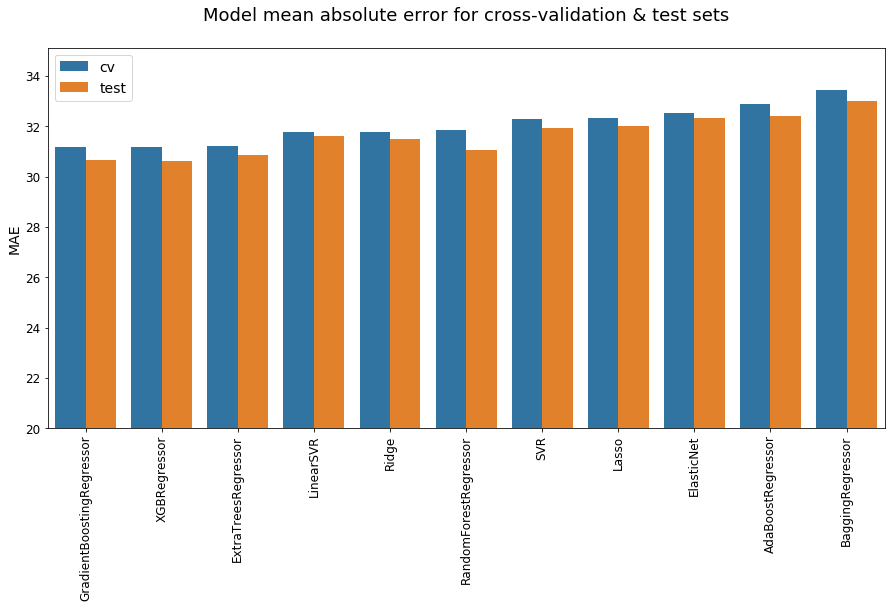

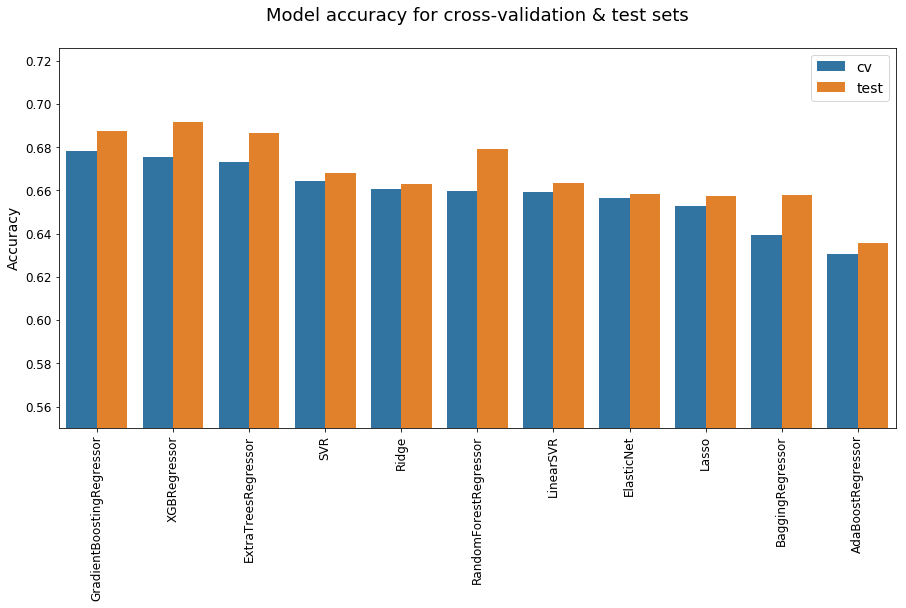

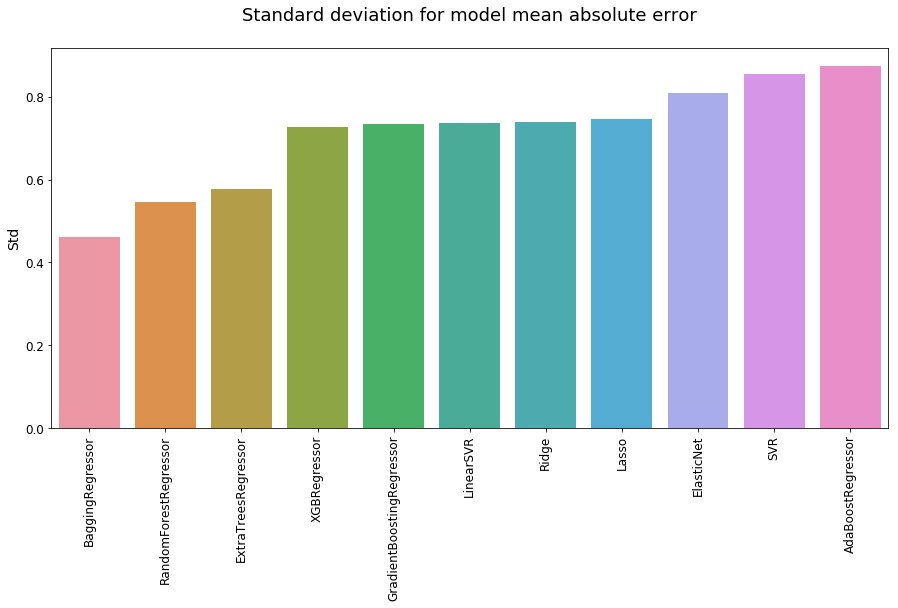

In [5]:
# MAE scores
mae_scores = estimator_scores.sort_values(['score_type', 'error'], ascending=[True, True])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='error', hue='score_type', data=mae_scores)
plt.ylim(bottom=20)
plt.title('Model mean absolute error for cross-validation & test sets\n', fontsize=18)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Accuracy scores
acc_scores = estimator_scores.sort_values(['score_type', 'accuracy'], ascending=[True, False])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='accuracy', hue='score_type', data=acc_scores)
plt.ylim(bottom=0.55)
plt.title('Model accuracy for cross-validation & test sets\n', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Std scores
std_scores = mae_scores[mae_scores['score_type'] == 'cv'].sort_values('std_error', ascending=True)

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='std_error', data=std_scores)
plt.title('Standard deviation for model mean absolute error\n', fontsize=18)
plt.ylabel('Std', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)

plt.show()

## Player Data + Opposition Player Data

In [6]:
PLAYER_STATS = ['kicks', 'marks', 'handballs', 'goals', 'behinds', 'hit_outs', 'tackles',
              'rebounds', 'inside_50s', 'clearances', 'clangers', 'frees_for',
              'frees_against', 'contested_possessions',
              'uncontested_possessions', 'contested_marks', 'marks_inside_50',
              'one_percenters', 'bounces', 'goal_assists', 'time_on_ground']
INDEX_COLS = ['team', 'year', 'round_number']

def oppo_features(data_frame):
    oppo_col_names = {col_name: f'oppo_{col_name}' for col_name in PLAYER_STATS}
    column_translations = {**{'oppo_team': 'team'}, **oppo_col_names}

    return (data_frame
            .loc[:, ['year', 'round_number', 'oppo_team'] + PLAYER_STATS]
            # We switch out oppo_team for team in the index,
            # then assign feature as oppo_{feature_column}
            .rename(columns=column_translations)
            .set_index(INDEX_COLS)
            .sort_index()
            .loc[:, oppo_col_names.values()])

oppo_match_df = pd.concat([match_df, oppo_features(match_df)], axis=1)
oppo_match_df

team  year  round_number  \
team             year round_number                                         
Adelaide         1991 1.0                   Adelaide  1991           1.0   
                      2.0                   Adelaide  1991           2.0   
                      3.0                   Adelaide  1991           3.0   
                      4.0                   Adelaide  1991           4.0   
                      5.0                   Adelaide  1991           5.0   
                      6.0                   Adelaide  1991           6.0   
                      7.0                   Adelaide  1991           7.0   
                      9.0                   Adelaide  1991           9.0   
                      10.0                  Adelaide  1991          10.0   
                      11.0                  Adelaide  1991          11.0   
                      12.0                  Adelaide  1991          12.0   
                      13.0                  Adelaide  1991          13.0   
                      14.0                  Adelaide  1991          14.0   
                      15.0                  Adelaide  1991          15.0   
                      16.0                  Adelaide  1991          16.0   
                      17.0                  Adelaide  1991          17.0   
                      18.0                  Adelaide  1991          18.0   
                      19.0                  Adelaide  1991          19.0   
                      20.0                  Adelaide  1991          20.0   
                      21.0                  Adelaide  1991          21.0   
                      22.0                  Adelaide  1991          22.0   
                      24.0                  Adelaide  1991          24.0   
                 1992 1.0                   Adelaide  1992           1.0   
                      3.0                   Adelaide  1992           3.0   
                      4.0                   Adelaide  1992           4.0   
                      5.0                   Adelaide  1992           5.0   
                      6.0                   Adelaide  1992           6.0   
                      7.0                   Adelaide  1992           7.0   
                      8.0                   Adelaide  1992           8.0   
                      9.0                   Adelaide  1992           9.0   
...                                              ...   ...           ...   
Western Bulldogs 2017 16.0          Western Bulldogs  2017          16.0   
                      17.0          Western Bulldogs  2017          17.0   
                      18.0          Western Bulldogs  2017          18.0   
                      19.0          Western Bulldogs  2017          19.0   
                      20.0          Western Bulldogs  2017          20.0   
                      21.0          Western Bulldogs  2017          21.0   
                      22.0          Western Bulldogs  2017          22.0   
                      23.0          Western Bulldogs  2017          23.0   
                 2018 1.0           Western Bulldogs  2018           1.0   
                      2.0           Western Bulldogs  2018           2.0   
                      3.0           Western Bulldogs  2018           3.0   
                      4.0           Western Bulldogs  2018           4.0   
                      5.0           Western Bulldogs  2018           5.0   
                      6.0           Western Bulldogs  2018           6.0   
                      7.0           Western Bulldogs  2018           7.0   
                      8.0           Western Bulldogs  2018           8.0   
                      9.0           Western Bulldogs  2018           9.0   
                      10.0          Western Bulldogs  2018          10.0   
                      11.0          Western Bulldogs  2018          11.0   
                      13.0          Western Bulldogs  2018          13.0   
                    

In [12]:
# Set up & split data for models

oppo_match_features = pd.get_dummies(oppo_match_df.drop(['score', 'oppo_score'], axis=1)).astype(float)
oppo_match_labels = pd.Series(oppo_match_df['score'] - oppo_match_df['oppo_score'], name='score_diff')
oppo_data = train_test_split(oppo_match_features, oppo_match_labels)

In [13]:
# Pass data to models & measure performance

oppo_estimator_scores = measure_estimators(estimators, oppo_data, model_type='regression')
oppo_estimator_scores

Training Lasso
Training ElasticNet
Training Ridge
Training LinearSVR
Training AdaBoostRegressor
Training BaggingRegressor
Training ExtraTreesRegressor
Training GradientBoostingRegressor
Training RandomForestRegressor
Training SVR
Training XGBRegressor


,estimator,accuracy,error,std_accuracy,std_error,score_type
0,Lasso,0.698356,29.878341,0.009170,0.382340,cv
1,ElasticNet,0.699488,30.288521,0.008772,0.399317,cv
2,Ridge,0.712841,28.945568,0.003550,0.333689,cv
3,LinearSVR,0.710729,29.035900,0.003917,0.332907,cv
4,AdaBoostRegressor,0.680927,30.428887,0.012009,0.390438,cv
5,BaggingRegressor,0.676023,31.314613,0.008778,0.479904,cv
6,ExtraTreesRegressor,0.702655,29.531485,0.004288,0.324932,cv
7,GradientBoostingRegressor,0.705750,29.335225,0.008958,0.298279,cv
8,RandomForestRegressor,0.701148,29.758940,0.011868,0.354806,cv
9,SVR,0.699563,30.693154,0.005929,0.360052,cv


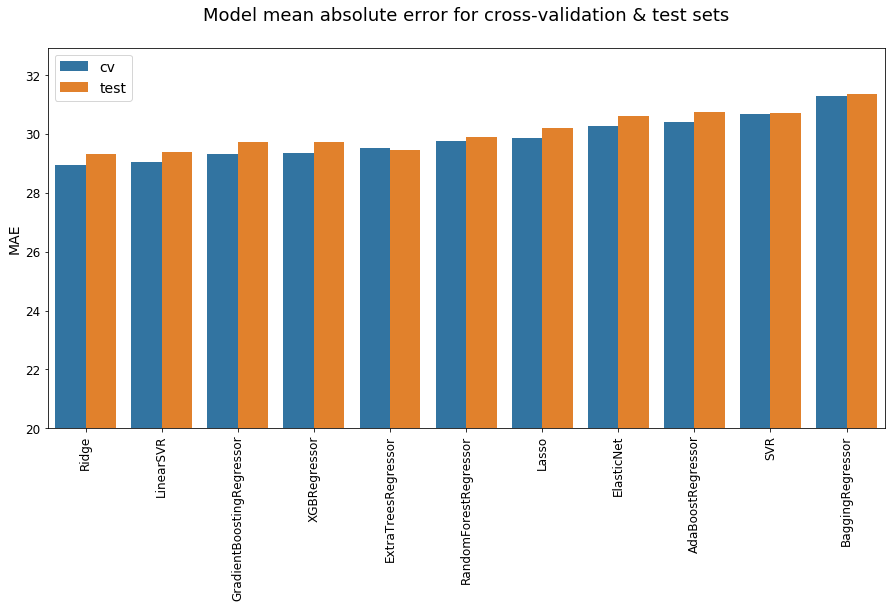

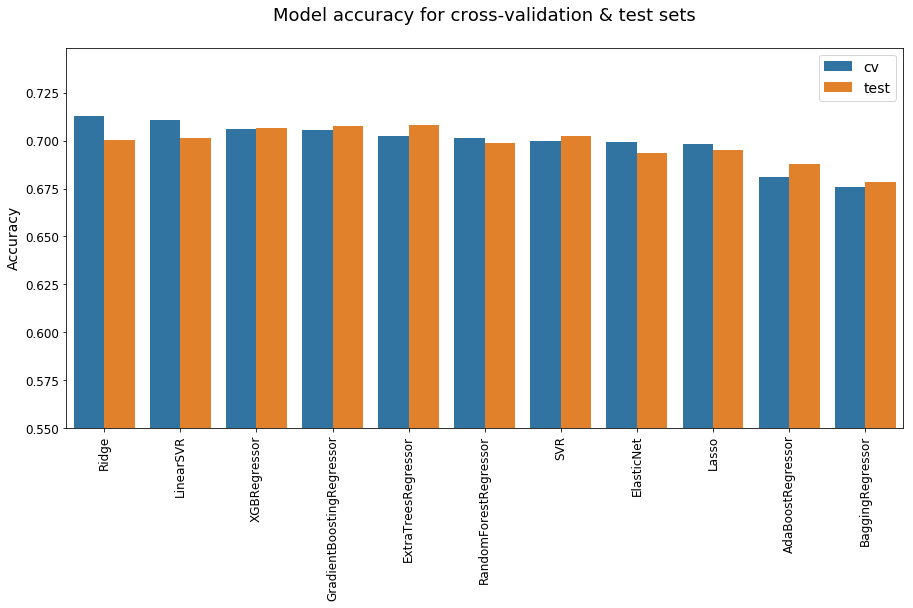

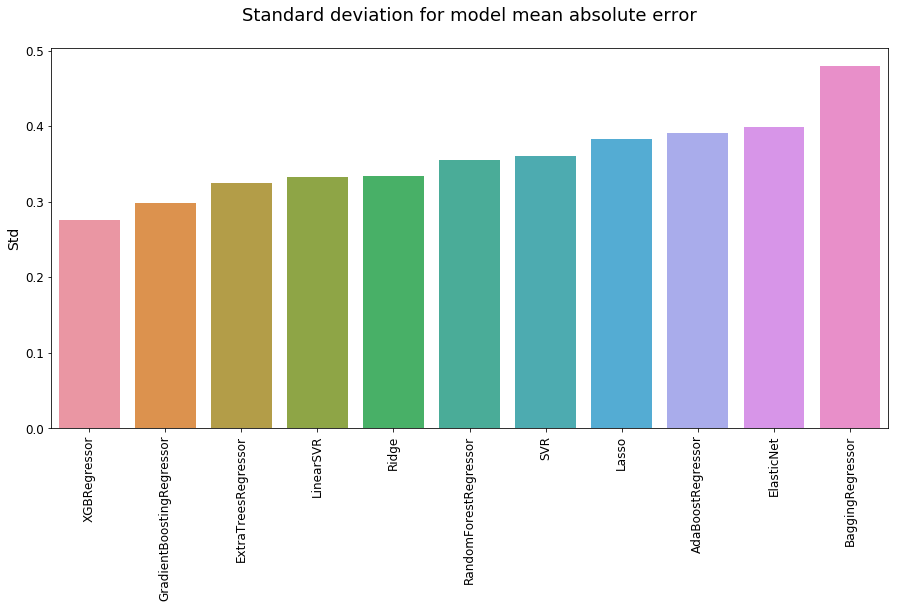

In [14]:
# MAE scores
oppo_mae_scores = oppo_estimator_scores.sort_values(['score_type', 'error'], ascending=[True, True])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='error', hue='score_type', data=oppo_mae_scores)
plt.ylim(bottom=20)
plt.title('Model mean absolute error for cross-validation & test sets\n', fontsize=18)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Accuracy scores
oppo_acc_scores = oppo_estimator_scores.sort_values(['score_type', 'accuracy'], ascending=[True, False])

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='accuracy', hue='score_type', data=oppo_acc_scores)
plt.ylim(bottom=0.55)
plt.title('Model accuracy for cross-validation & test sets\n', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

# Std scores
oppo_std_scores = oppo_mae_scores[oppo_mae_scores['score_type'] == 'cv'].sort_values('std_error', ascending=True)

plt.figure(figsize=(15, 7))
sns.barplot(x='estimator', y='std_error', data=oppo_std_scores)
plt.title('Standard deviation for model mean absolute error\n', fontsize=18)
plt.ylabel('Std', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)

plt.show()

### Adding oppo data definitely improves performance

In [20]:
xgb = make_pipeline(StandardScaler(), XGBRegressor())
gb = make_pipeline(StandardScaler(), GradientBoostingRegressor())
ridge = make_pipeline(StandardScaler(), Ridge())
lsvr = make_pipeline(StandardScaler(), LinearSVR())

estimators = (xgb, gb, ridge, lsvr)

model_names = []
errors = []
accuracies = []
years = []

for year in range(2006, 2017):
    X_train = match_features[match_features['year'] < year]
    X_test = match_features[match_features['year'] == year]
    y_train = match_labels.loc[X_train.index]
    y_test = match_labels.loc[X_test.index]
    
    for estimator in estimators:
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)

        years.append(year)
        model_names.append(estimator.steps[-1][0])
        errors.append(mean_absolute_error(y_test, y_pred))
        accuracies.append(regression_accuracy(y_test, y_pred))
        
year_scores = pd.DataFrame({'model': model_names,
                            'year': years,
                            'error': errors,
                            'accuracy': accuracies}).astype({'year': int})
year_scores

,model,year,error,accuracy
0,xgbregressor,2006,32.009215,0.656757
1,gradientboostingregressor,2006,32.412755,0.654054
2,ridge,2006,34.612425,0.586486
3,linearsvr,2006,34.431877,0.583784
4,xgbregressor,2007,29.509534,0.672973
5,gradientboostingregressor,2007,29.354021,0.670270
6,ridge,2007,31.060827,0.621622
7,linearsvr,2007,30.994479,0.637838
8,xgbregressor,2008,32.569041,0.629730
9,gradientboostingregressor,2008,32.572882,0.635135


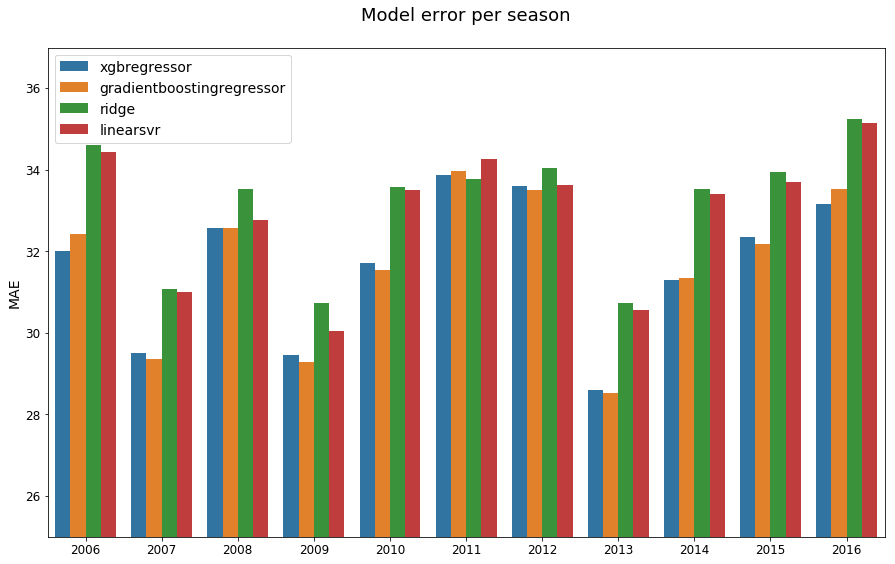

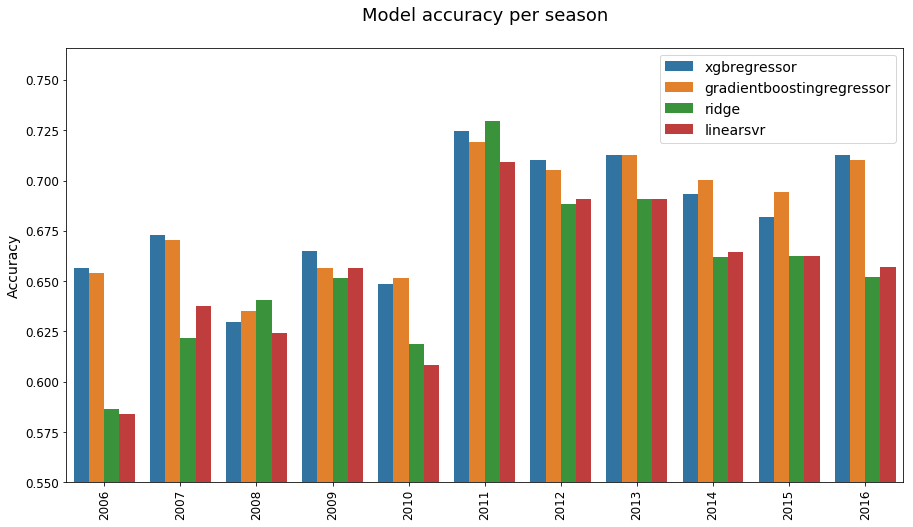

In [21]:
# MAE scores
plt.figure(figsize=(15, 9))
sns.barplot(x='year', y='error', hue='model', data=year_scores)
# Not starting axis at 0 to make small relative differences clearer
plt.ylim(bottom=25)
plt.title('Model error per season\n', fontsize=18)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=14)

plt.show()

# Accuracy scores
plt.figure(figsize=(15, 8))
sns.barplot(x='year', y='accuracy', hue='model', data=year_scores)
# Not starting axis at 0 to make small relative differences clearer
plt.ylim(bottom=0.55)
plt.title('Model accuracy per season\n', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()

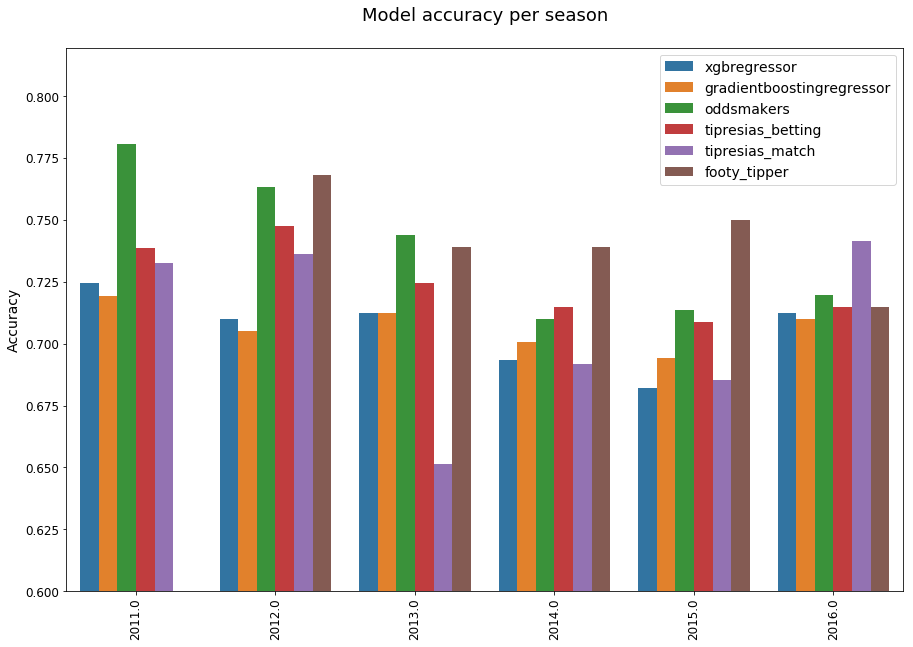

In [22]:
prediction_df = pd.read_csv('../data/model_predictions.csv')
prediction_scores = (prediction_df
                     .groupby(['model', 'year'])
                     .mean()['tip_point']
                     .reset_index()
                     .rename(columns={'tip_point': 'accuracy'}))
# Footy tipper accuracy scores taken from a trial that took too long to run,
# so I'm just copy pasting from a notebook
footy_tipper_scores = pd.DataFrame({'model': ['footy_tipper'] * len(range(2012, 2017)),
                                    'year': list(range(2012, 2017)),
                                    'error': [0] * len(range(2012, 2017)),
                                    'accuracy': [0.768116, 0.739130, 0.739130, 0.750000, 0.714976]})

all_year_scores = (pd
                   .concat([year_scores[(year_scores['model'] == 'xgbregressor') | (year_scores['model'] == 'gradientboostingregressor')],
                            prediction_scores, footy_tipper_scores],
                           sort=True)
                   .reset_index(drop=True))

# Accuracy scores
plt.figure(figsize=(15, 10))
sns.barplot(x='year', y='accuracy', hue='model', data=all_year_scores[all_year_scores['year'] > 2010])
# Not starting axis at 0 to make small relative differences clearer
plt.ylim(bottom=0.6)
plt.title('Model accuracy per season\n', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.legend(fontsize=14)

plt.show()